In [19]:
import scanpy as sc
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# my_file = "/share/ScratchGeneral/anncuo/OneK1K/expression_objects/sce2.h5ad"
my_file = "/share/ScratchGeneral/anncuo/OneK1K/expression_objects/sce22.h5ad"

In [3]:
adata = sc.read(my_file)

In [4]:
adata

AnnData object with n_obs × n_vars = 1272489 × 90
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pool', 'individual', 'percent.mt', 'latent', 'nCount_SCT', 'nFeature_SCT', 'cell_type'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_variance', 'sct.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [5]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type
AAACCTGAGAATGTTG-1,0,57.0,24,0,691_692,1.451409,0,41.0,24,1
AAACCTGAGAGAACAG-1,0,47.0,29,0,693_694,3.700691,0,50.0,29,14
AAACCTGAGCATGGCA-1,0,38.0,16,0,688_689,3.386373,0,41.0,16,0
AAACCTGAGTATTGGA-1,0,131.0,49,0,683_684,2.626147,0,47.0,26,5
AAACCTGAGTGTCCCG-1,0,55.0,24,0,684_685,4.911875,0,50.0,24,3
...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCGCTGTT-9,0,50.0,25,8,796_797,3.118305,0,41.0,25,13
TTTGTCATCCGTTGTC-9,0,75.0,22,8,800_801,2.147175,0,51.0,22,0
TTTGTCATCGCCGTGA-9,0,70.0,20,8,821_822,2.314197,0,51.0,20,0
TTTGTCATCGCGGATC-9,0,73.0,28,8,840_841,3.432701,0,57.0,28,0


In [6]:
adata.var.index

Index(['SLC25A18', 'BID', 'TUBA8', 'CLDN5', 'SEPT5', 'TBX1', 'ARVCF',
       'LINC00896', 'AC002472.13', 'SDF2L1', 'YPEL1', 'MAPK1', 'VPREB1',
       'GNAZ', 'IGLL1', 'ZNF70', 'VPREB3', 'DERL3', 'FAM211B', 'SGSM1',
       'KIAA1671', 'TPST2', 'CRYBA4', 'XBP1', 'GAS2L1', 'RNF215', 'PIK3IP1',
       'YWHAH', 'SYN3', 'LARGE', 'HMOX1', 'APOL6', 'RBFOX2', 'APOL2', 'PVALB',
       'IL2RB', 'RAC2', 'LGALS2', 'GGA1', 'LGALS1', 'SOX10', 'MAFF', 'FAM227A',
       'CBX6', 'APOBEC3A', 'APOBEC3B', 'APOBEC3C', 'APOBEC3D', 'APOBEC3G',
       'SYNGR1', 'GRAP2', 'TNRC6B', 'DNAJB7', 'TNFRSF13C', 'RNU12', 'TSPO',
       'KIAA1644', 'PRR5', 'ARHGAP8', 'FAM118A', 'WNT7B', 'TTC38', 'CRELD2',
       'MLC1', 'MIOX', 'TYMP', 'AC006547.15', 'AC007050.17', 'AC007308.6',
       'LL22NC03-2H8.5', 'IGLL5', 'LL22NC03-N27C7.1', 'AP000350.5',
       'CTA-445C9.15', 'MIAT', 'CTA-373H7.7', 'ZNRF3-AS1', 'RP1-130H16.16',
       'RFPL3S', 'LL22NC03-32F9.1', 'CTA-228A9.3', 'RP1-5O6.5',
       'RP3-508I15.22', 'RP3-333H23.8'

In [7]:
sc.pp.log1p(adata)

/share/ScratchGeneral/anncuo/jupyter/conda_notebooks/envs/cellregmap_notebook/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [8]:
adata.raw.X.shape

(1272489, 600)

In [9]:
mat = adata.raw.X.todense()

In [10]:
mat_df = pd.DataFrame(data=mat.T, index=adata.raw.var.index, columns=adata.obs.index)

In [11]:
mat_df.head()

,AAACCTGAGAATGTTG-1,AAACCTGAGAGAACAG-1,AAACCTGAGCATGGCA-1,AAACCTGAGTATTGGA-1,AAACCTGAGTGTCCCG-1,AAACCTGCAAATTGCC-1,AAACCTGCAACGATCT-1,AAACCTGCAAGACGTG-1,AAACCTGCAAGCGCTC-1,AAACCTGCACACGCTG-1,...,TTTGTCAGTGTGAAAT-9,TTTGTCATCACCTTAT-9,TTTGTCATCAGAGCTT-9,TTTGTCATCAGATAAG-9,TTTGTCATCATTGCCC-9,TTTGTCATCCGCTGTT-9,TTTGTCATCCGTTGTC-9,TTTGTCATCGCCGTGA-9,TTTGTCATCGCGGATC-9,TTTGTCATCTCGTATT-9
AC002472.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KIAA1658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC005003.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCT8L2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TPTEP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
gene_name = 'AC002472.1'

In [14]:
phenotype = xr.DataArray(mat_df.values, dims=["trait", "cell"], coords={"trait": mat_df.index.values, "cell": mat_df.columns.values})

In [15]:
phenotype

<xarray.DataArray (trait: 600, cell: 1272489)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * trait    (trait) object 'AC002472.1' 'KIAA1658' ... 'AC000036.4'
  * cell     (cell) object 'AAACCTGAGAATGTTG-1' ... 'TTTGTCATCTCGTATT-9'

In [17]:
y = phenotype.sel(trait=gene_name)

In [21]:
(y == 0).astype(int).sum()/len(y)

<xarray.DataArray ()>
array(0.9999945)
Coordinates:
    trait    <U10 'AC002472.1'

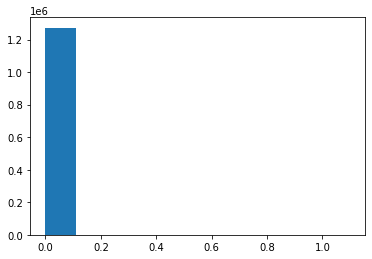

In [20]:
plt.hist(y)
plt.show()

In [30]:
n_genes = adata.raw.X.shape[1]
n_genes

1688

In [32]:
n = 0
for i in range(n_genes):
    y = mat[:,i]
    if (y == 0).astype(int).sum()/len(y)==1:
        n = n+1
#         print("All zeroes, skipping gene")
n

0

In [37]:
n = 0
for i in range(n_genes):
    y = mat[:,i]
    if (y == 0).astype(int).sum()/len(y)>0.99:
        n = n+1
#         print("Over 99 percent zeroes, skipping gene")
n

1077

In [33]:
n = 0
for i in range(n_genes):
    y = mat[:,i]
    if (y == 0).astype(int).sum()/len(y)>0.95:
        n = n+1
#         print("Over 95 percent zeroes, skipping gene")
n

1399

In [34]:
n = 0
for i in range(n_genes):
    y = mat[:,i]
    if (y == 0).astype(int).sum()/len(y)>0.9:
        n = n+1
#         print("Over 90 percent zeroes, skipping gene")
n

1525

In [35]:
n = 0
for i in range(n_genes):
    y = mat[:,i]
    if (y == 0).astype(int).sum()/len(y)>0.8:
        n = n+1
#         print("Over 80 percent zeroes, skipping gene")
n

1619

In [36]:
n = 0
for i in range(n_genes):
    y = mat[:,i]
    if (y == 0).astype(int).sum()/len(y)>0.7:
        n = n+1
#         print("Over 70 percent zeroes, skipping gene")
n

1657

In [21]:
import matplotlib.pyplot as plt
i = 10
y = mat[:,i]
plt.hist(y)
plt.show()

In [10]:
adata.X.shape

(1272489, 210)

In [21]:
gene = "HES4"

In [26]:
adata[:, ['HES4']].X.shape

(1272489, 1)

In [ ]:
## test difference in computation time
### 1: for each chr make pandas dataframe with cells and gene names, create csv files, open then select gene
### 2: like 1 but turning csv into pkl
### 3: directly open anndata, extract expression for the selected gene - still somehow make sure correct cells + order

In [23]:
import time

In [ ]:
############## option 1 (csv)

In [26]:
start_time = time.time()
mat_df.to_csv("/share/ScratchGeneral/anncuo/OneK1K/expression_objects/phenotype_chr22.csv")
print("--- %s seconds ---" % (time.time() - start_time))

--- 1671.1807639598846 seconds ---


In [ ]:
### option 1
start_time = time.time()
mat_df = pd.read_csv("/share/ScratchGeneral/anncuo/OneK1K/expression_objects/phenotype_chr22.csv")
# turn into xr array
phenotype = xr.DataArray(mat_df.values, dims=["trait", "cell"], coords={"trait": mat_df.index.values, "cell": mat_df.columns.values})
# select gene
y = phenotype.sel(trait=gene_name)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
############## option 2 (pkl)

In [ ]:
start_time = time.time()
csv_filename = "/share/ScratchGeneral/anncuo/OneK1K/expression_objects/phenotype_chr22.csv"
pkl_filename = csv_filename + ".pkl"
mat_df.to_pickle(pkl_filename)
print("--- %s seconds ---" % (time.time() - start_time))s

In [ ]:
### option 2
start_time = time.time()
mat_df = pd.read_pickle(pkl_filename)
# turn into xr array
phenotype = xr.DataArray(mat_df.values, dims=["trait", "cell"], coords={"trait": mat_df.index.values, "cell": mat_df.columns.values})
# select gene
y = phenotype.sel(trait=gene_name)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
############## option 3 (anndata)

In [25]:
### option 3
start_time = time.time()
# open anndata 
adata = sc.read(my_file)
# sparse to dense
mat = adata.raw.X.todense()
# make pandas dataframe
mat_df = pd.DataFrame(data=mat.T, index=adata.raw.var.index, columns=adata.obs.index)
# turn into xr array
phenotype = xr.DataArray(mat_df.values, dims=["trait", "cell"], coords={"trait": mat_df.index.values, "cell": mat_df.columns.values})
# select gene
y = phenotype.sel(trait=gene_name)
print("--- %s seconds ---" % (time.time() - start_time))

--- 19.877252340316772 seconds ---


In [ ]:
input_files_dir = "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/"
C_file = input_files_dir+"PCs.csv"

In [ ]:
start_time = time.time()
C = pd.read_csv(C_file, index_col = 0)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
pkl_filename = C_file + ".pkl"
C.to_pickle(pkl_filename)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
C_pkl = pd.read_pickle(pkl_filename)
print("--- %s seconds ---" % (time.time() - start_time))